# **Telecom X - Análisis de Evasión de Clientes**

Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

\

**🎯 Misión**

\

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.




# **📌 Manejo de datos**


Primero que nada, comenzaremos por importar nuestra base de datos del Challenge número 2.  En el cual realizamos una base de datos limpia de valores nulos, espacios en blanco y convertimos muchas columnas de tipo dicotómico en columnas de binarios.  Esto nos ayudó a poder realizar mediciones y comparativas con las proporciones de clientes en nuestras bases de datos.

\

Para poder reutilizar esta base de datos, simplemente la importamos como un archivo de CSV y lo ejecutamos dentro de nuestro código.  Donde estará guardada dentro de una variable llamada df.




---



## **Importacion de librerías y base de datos**

In [25]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Guardamos nuestra base de datos en DF y le damos una revisada
df = pd.read_csv('/content/datos_tratados.csv')
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80



---


## **Revision y eliminación de Columnas Irrelevantes**


---


Para poder decidir cuales son las columnas que ya no nos sirven, es necesario primero conocer cuales son las columnas presentes dentro de nuestro DataFrame.   Esto lo sabremos utilizando el método info() y nos arrojara todas nuestras columnas enlistadas, diciéndonos qué tipo de datos tiene cada una  

In [26]:
#Vemos los tipos de valor en nuestra tabla
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### **Descipción de variables**

Nos interesa conocer las estadísticas de cada una de nuestras columnas, por lo que recurriremos al método describe() para conocer información importante como lo es:
*   **Para variables numéricas:** \
  La media, la desviación estándar, los cuartiles y los limites mínimo y máximo
*   **Para variables categoricas:** \
  La moda, cuantas variantes únicas tiene y la frecuencia.

In [27]:
#Vemos las variables numericas y sus estadisticas
display(df.describe())

,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [28]:
#Vemos las variables categoricas y sus estadisticas
display(df.describe(include='O'))

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


### **Eliminar columnas innecesarias**

Considerando que realizaremos un análisis de la información al por mayor, de decidió que se eliminaría la columna cosumerID, esto porque como vemos en el describe, existen un total de 7043 frecuencias diferentes que no son posibles de contabilizar ni relacionar con ninguna tabla al tratarse de patrones.

In [29]:
#Eliminamos la columna de costumerID porque es irrelevante en nuestro análisis
df = df.drop(columns = 'customerID')

In [30]:
#Ahora solo nos quedamos con las siguientes columnas
df.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Cuentas_diarias']



---


## **Codificación de columnas**

---



Ahora que ya no quedan columnas inservibles, nuestro siguiente trabajo es conseguir que todas nuestras columnas se conviertan en valores codificados

***(Que quiere decir esto)***

Que todo lo que tenemos ahora deberán ser números, esto con el objetivo de poder hacer relaciones, correlaciones, cálculos y estadísticas. Como anteriormente había convertido todas las variables dicotómicas en verdadero y falso, lo único que tengo que hacer en este momento es realizar un replace() con 1 y 0 para todas las columnas que son booleanas.


In [31]:
#Doy un vistazo a mis datos
df.sample(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
1561,False,Female,False,True,False,72,True,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,True,Electronic check,110.75,7751.70,3.69
2556,False,Female,False,True,True,69,True,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,False,Credit card (automatic),113.25,7895.15,3.78
4678,False,Female,False,False,False,13,True,No,Fiber optic,No,...,No,No,No,No,One year,True,Mailed check,74.65,966.25,2.49


### **Codificación de variables booleanas**

Para las columnas booleanas solo es necesario cambiar los valores que se encuentran en False a 0 y los True a 1

In [32]:
#Guardo en una lista el nombre de todas mis columnas booleanas para convertirlas a 0 y 1
col_booleanas = ['Churn',
'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',]

In [33]:
#Declaro una funcion para convertir mis variables booleanas a numericas
def BoolANum (datos, columna):
  datos[columna] = datos [columna].replace({False:0, True:1})

#Ahora las convierto con un ciclo
for columna in col_booleanas:
  BoolANum(df,columna)

Una vez que terminamos de codificar nuestras variables booleanas, verificamos que efectivamente nuestras variables ahora son de tipo int64

In [34]:
#Verificamos que se hayan convertido bien
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
3123,0,Female,1,0,0,8,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Bank transfer (automatic),74.05,600.15,2.47
3067,0,Male,0,0,0,22,1,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,1,Bank transfer (automatic),94.95,2142.80,3.16
6759,0,Female,0,1,1,56,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,24.45,1385.85,0.82


### **Codificación de las variables categoricas**
Ahora, para las variables categóricas es algo un poco más laborioso, ya que necesitamos crear una columna nueva por cada rama de las categorías presentes.  Esto quiere decir que, por ejemplo, la columna PaymentMethod que tiene 4 posibles resultados ahora se convertirá en 4 columnas llamadas como PaymentMethod + el nombre de la rama.


In [35]:
#Para la siguiente utilizamos el OneHotEncoder, primero hacemos lo mismo que la
#vez anterior, guardamos las variables en una lista
col_cats=['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [36]:
#A partir de aqui, utilizare una nueva DF con el objetivo de conservar mi tabla original
#parcialmente intacta, ademas de que esta tendra muchas manipulaciones.
df_cod = pd.get_dummies(data=df, columns=col_cats, dtype= int)
df_cod.sample(3)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_diarias,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2420,0,0,1,1,15,1,1,69.50,1071.40,2.32,...,0,0,1,1,0,0,0,0,0,1
1232,0,0,1,1,65,1,0,94.55,6078.75,3.15,...,1,0,0,0,0,1,0,1,0,0
2879,0,0,1,0,24,1,0,53.60,1315.35,1.79,...,1,0,0,1,0,0,0,0,0,1


Es ahora que todas las ramas están codificadas correctamente como lo podemos verificar a continuación

In [37]:
#Terminamos con una base con 43 columnas donde todo esta codificado
df_cod.shape

(7043, 43)

In [38]:
#Verificamos los tipos de dato
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   Charges.Monthly                          7043 non-null   float64
 8   Charges.Total                            7043 non-null   float64
 9   Cuentas_diarias                          7043 non-null   float64
 10  gender_Female                            7043 no

### **Revisión de la variable Churn**

Antes de proceder a cualquier cosa, haremos una revisión de los valores de la estadística de abandono, simplemente para tener una visión general de los datos que estamos tratando.

In [39]:
#Vemos la cantidad de abandonos
proporcion = df["Churn"].value_counts()
proporcion

,count
Churn,
0,5174
1,1869


In [40]:
#Vemos el porcentaje total de abandono
#Podemos observar como hay un enorme desbalanceo de la variable abandono.
proporcion = df["Churn"].value_counts(normalize=True)
proporcion

,proportion
Churn,
0,0.73463
1,0.26537


In [41]:
#Aqui vemos la suma de cada abandono por variable
proporciones = df_cod.groupby("Churn").sum()
proporciones

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_diarias,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,
0,666,2733,1784,194387,4662,2771,316985.75,13193241.8,10565.72,2549,...,1847,1413,1914,2220,1307,1647,1286,1290,1294,1304
1,476,669,326,33603,1699,1400,139130.85,2862926.9,4637.83,939,...,938,113,818,1655,166,48,258,232,1071,308


### **Porcentaje del Abandono por variable**

In [42]:
#Aqui vemos la proporcion porcentual para cada variable frente al abandono
#Por ejemplo, cuanta gente con streaming ha abandonado, cuantos no etc
for col in df_cod.columns:
    if col != "Churn":  # evitamos comparar consigo misma
        tabla = pd.crosstab(df_cod[col], df_cod["Churn"], normalize="index") * 100
        print('*'*60,f'\n\nColumna: {col}')
        print(tabla)

************************************************************ 

Columna: SeniorCitizen
Churn                  0          1
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261
************************************************************ 

Columna: Partner
Churn            0          1
Partner                      
0        67.042021  32.957979
1        80.335097  19.664903
************************************************************ 

Columna: Dependents
Churn               0          1
Dependents                      
0           68.720860  31.279140
1           84.549763  15.450237
************************************************************ 

Columna: tenure
Churn            0          1
tenure                       
0       100.000000   0.000000
1        38.009788  61.990212
2        48.319328  51.680672
3        53.000000  47.000000
4        52.840909  47.159091
...            ...        ...
68       91.000000   9.000000
69    

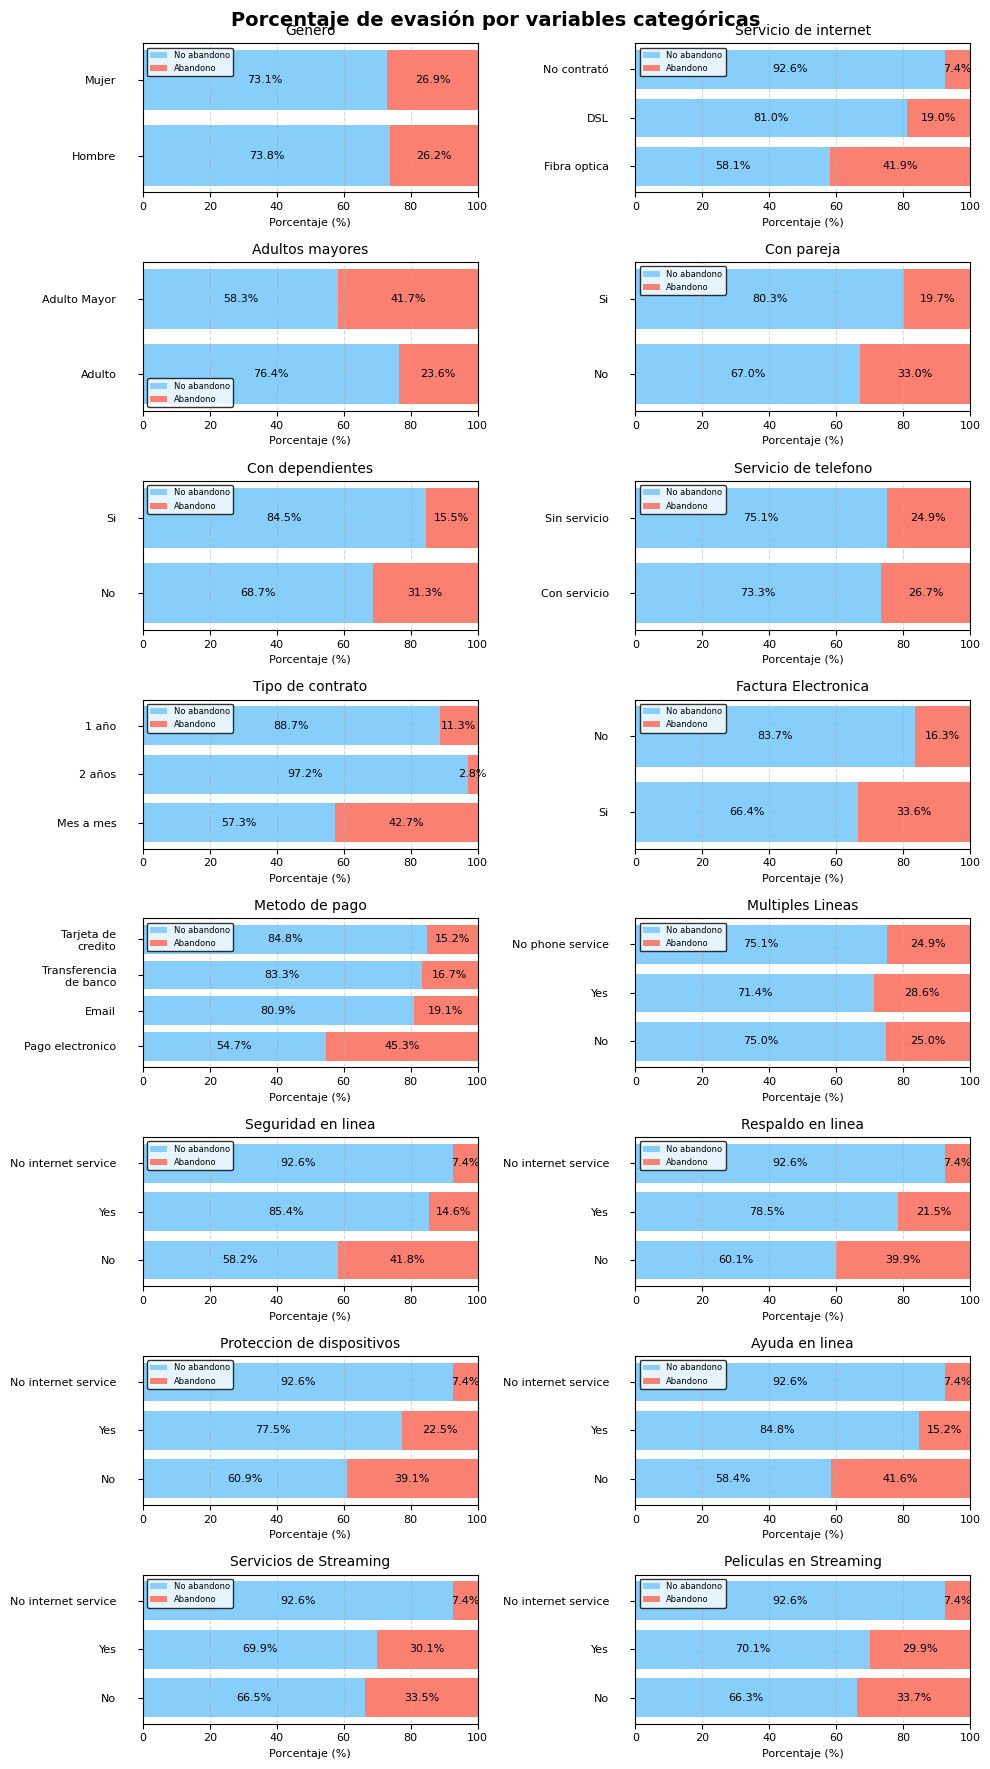

In [43]:
df_n = (df["Churn"]==False)
df_y = (df["Churn"]==True)
df[df_n]

df_abandono = df[df_n]
df_continua = df[df_y]

colores = ['lightskyblue','salmon']

#Creo mi función para crear graficas apiladas de porcentaje
def graf_comparacion_pct(pos1, pos2, columna, titulo, categorias):

  #Se guardan los value counts dentro de una variable, junto con otras cositas que usaremos
  totales_col = df[columna].value_counts()
  orden = totales_col.index.tolist()
  tam_font = 8

  # Conteos de abandono y continuación
  aban = df_continua[columna].value_counts().reindex(orden, fill_value=0)
  cont = df_abandono[columna].value_counts().reindex(orden, fill_value=0)

    #
  tot = cont + aban
  pct_cont = np.where(tot > 0, cont / tot * 100, 0.0)
  pct_aban = np.where(tot > 0, aban / tot * 100, 0.0)

  y = np.arange(len(orden))

  # Aqui imprimimos las barras una sobre la otra
  axs[pos1][pos2].barh(y, pct_cont, label="No abandono", color=colores[0])
  axs[pos1][pos2].barh(y, pct_aban, left=pct_cont, label="Abandono", color=colores[1])

  # Aqui se imprimen las etiquetas y ticks
  etiquetas = categorias if len(categorias) == len(orden) else orden
  axs[pos1][pos2].set_yticks(y)
  axs[pos1][pos2].set_yticklabels(etiquetas, ha='right')

  #Aqui acomodo poquito los labels de los ticks para que no se sobrepongan
  for label in axs[pos1][pos2].get_yticklabels():
    label.set_x(-0.05)

  axs[pos1][pos2].set_xlabel('Porcentaje (%)', fontsize=tam_font)
  axs[pos1][pos2].tick_params(axis='x', labelsize=tam_font)
  axs[pos1][pos2].tick_params(axis='y', labelsize=tam_font)
  axs[pos1][pos2].set_title(titulo, fontsize=10)
  axs[pos1][pos2].set_xlim(0, 100)
  axs[pos1][pos2].grid(axis='x', linestyle='--', alpha=0.5)
  axs[pos1][pos2].legend(fontsize=tam_font-2, frameon=True, facecolor='white', edgecolor='black')

  # Aqui se muestran los porcentajes, solo es un calculo para centrar el text y formato de letra
  for i in range(len(y)):
    if pct_cont[i] > 0:
      axs[pos1][pos2].text(pct_cont[i] / 2, y[i], f"{pct_cont[i]:.1f}%",
                           va='center', ha='center', fontsize=tam_font, color='black')
    if pct_aban[i] > 0:
      axs[pos1][pos2].text(pct_cont[i] + pct_aban[i] / 2, y[i], f"{pct_aban[i]:.1f}%",
                                 va='center', ha='center', fontsize=tam_font, color='black')

fig, axs = plt.subplots (8,2, figsize=(10,18))
fig.subplots_adjust(hspace=.5,wspace=.4)
fig.suptitle('Porcentaje de evasión por variables categóricas',fontsize=14, weight='bold')

graf_comparacion_pct(0, 0,'gender','Genero',['Hombre','Mujer'])
graf_comparacion_pct(0, 1,'InternetService','Servicio de internet',['Fibra optica','DSL','No contrató'])
graf_comparacion_pct(1, 0,'SeniorCitizen','Adultos mayores',['Adulto','Adulto Mayor'])
graf_comparacion_pct(1, 1,'Partner','Con pareja',['No','Si'])
graf_comparacion_pct(2, 0,'Dependents','Con dependientes',['No','Si'])
graf_comparacion_pct(2, 1,'PhoneService','Servicio de telefono',['Con servicio','Sin servicio'])
graf_comparacion_pct(3, 0,'Contract','Tipo de contrato',['Mes a mes','2 años','1 año'])
graf_comparacion_pct(3, 1,'PaperlessBilling','Factura Electronica',['Si','No'])
graf_comparacion_pct(4, 0,'PaymentMethod','Metodo de pago',['Pago electronico','Email','Transferencia\nde banco','Tarjeta de\ncredito'])

graf_comparacion_pct(4, 1,'MultipleLines','Multiples Lineas',['Si','No'])
graf_comparacion_pct(5, 0,'OnlineSecurity','Seguridad en linea',['Si','No'])
graf_comparacion_pct(5, 1,'OnlineBackup','Respaldo en linea',['Si','No'])
graf_comparacion_pct(6, 0,'DeviceProtection','Proteccion de dispositivos',['Si','No'])
graf_comparacion_pct(6, 1,'TechSupport','Ayuda en linea',['Si','No'])
graf_comparacion_pct(7, 0,'StreamingTV','Servicios de Streaming',['Si','No'])
graf_comparacion_pct(7, 1,'StreamingMovies','Peliculas en Streaming',['Si','No'])

plt.tight_layout()
plt.show()

##**Representación de las variables**

### **Correlación de las variables entre si**

La correlación se trata de como una variable especifica influye dentro de la existencia de las demás variables, es decir, que la correlación te dice que tanto cambiaria el valor de una variable si es que cambia el valor de otra.   Entre mas cercano a 0 sea la correlación, significa que esa variable no aporta mucho dentro de nuestro conjunto de datos.O, al contrario, si una correlación es igual a 1, significa que las variables son exactamente iguales. \
\
Una correlacion puede ser tanto positivas, como negativas.  Lo que quiere decir que tu variable puede hacer que subas o que bajes, dependiendo de la relación que hayan formado entre si.

In [44]:
#Hacemos el analisis de correlación con la variable de abandono.
correlacion = df_cod.corr()['Churn'].sort_values(ascending=False)
print(correlacion)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
Cuentas_diarias                            0.193412
Charges.Monthly                            0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender_Female                              0.008612
gender_Male 

Aquí podemos ver como algunas hipótesis que se plantearon en el Challenge 2 como el problema en los contratos de mes a mes y la fibra óptica si influyen altamente en la decisión de los usuarios por abandonas.  Mientras que los clientes con tenencia alta tienden a mantenerse dentro de la empresa.

### **Matriz de correlacion 1**


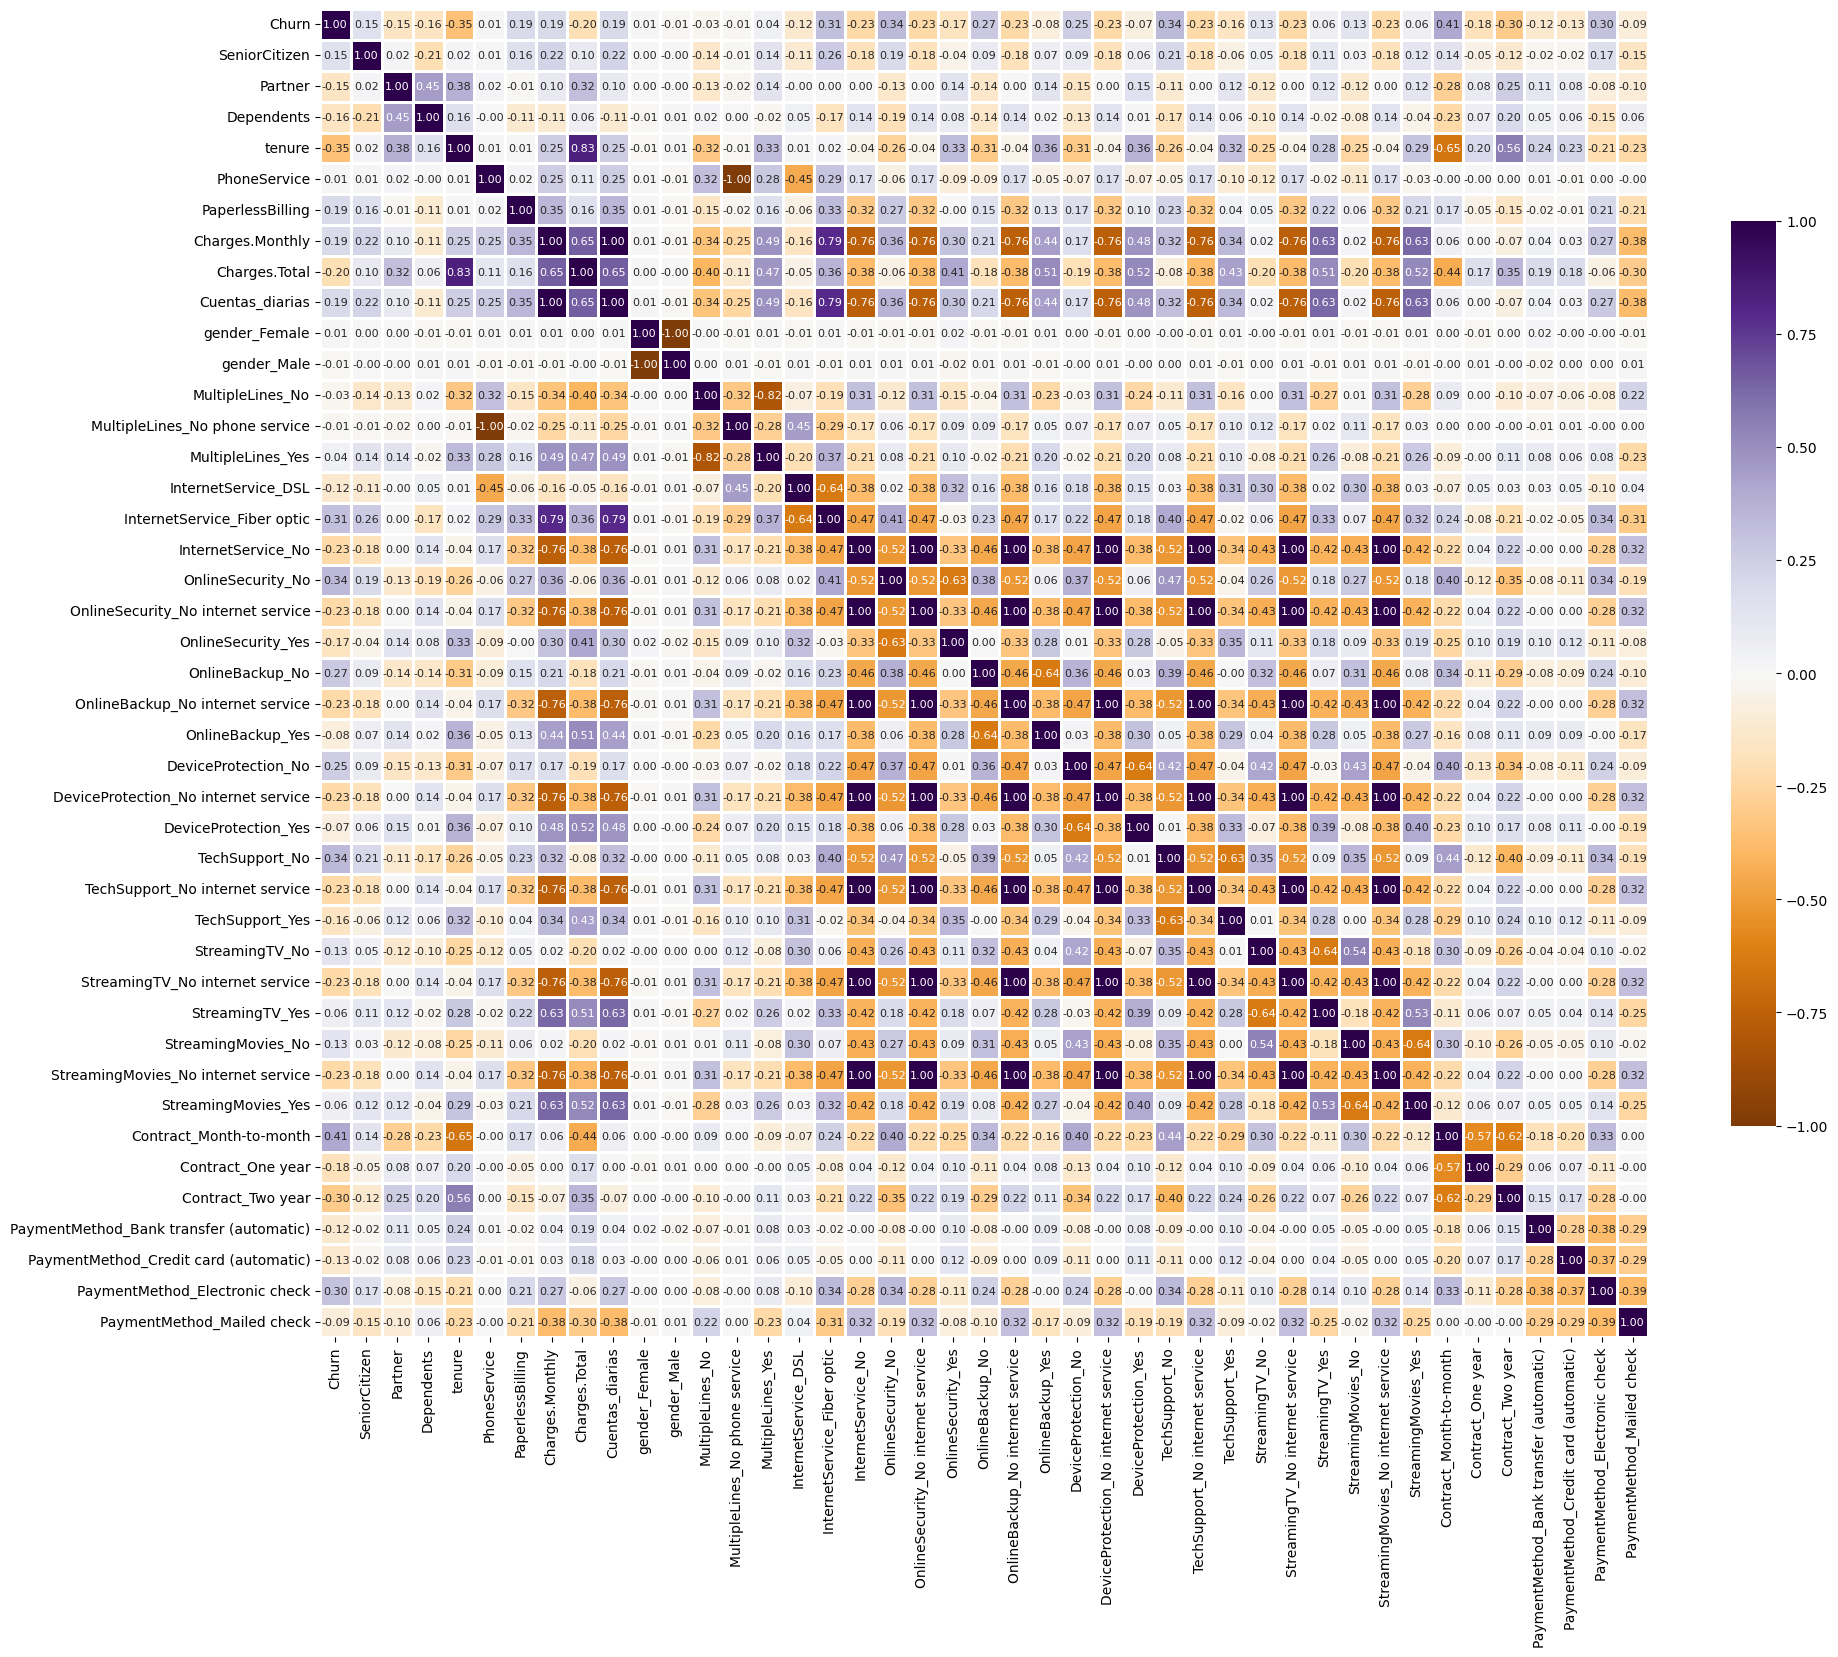

In [45]:
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(
    np.round(df_cod.corr(), 2),
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=1,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
    cmap="PuOr"
)

plt.tight_layout()
plt.show()

Dentro de la tabla anterior podemos observar a simple vista como hay relaciones que, de verdad, absolutamente no aportan nada al estudio. No solo en la influencia del abandono, sino que directamente no generan una relación con ninguna de las variables. Tal como es el caso de Género.

\
Como nuestro estudio se centra en conocer las relaciones de  Churn, a continuación voy a realizar un sesgo para eliminar relaciones que no sean importantes en el estudio comparándolas con el valor de abandono.


### **Matriz de correlacion 2**

Para eso cree un nuevo DataFrame en el que guardo las correlaciones de la columna Churn.  Después de eso evalúa cuales de ellas tienen una influencia significativa, y guardo esa información en corr_altas_churn.

In [46]:

# Seleccionamos las correlaciones con la variable 'abandono' (sin incluir ella misma)
df_corr = df_cod.corr()
df_corr = df_corr['Churn']

# Establezco un limite con el que permitiré una tolerancia maxima a los valores de correlacion.
# Con ese mismo limite comparare tanto las relaciones positivas como las negativas.
# Como anteriormente el valor mas alto de correlacion fue el .4, ahora le dare un 30% de ese valor maximo, es decir .12
limite = .12
corr_altas_churn = df_corr[(df_corr > limite) |( df_corr < -limite) ].sort_values(ascending=False)

#Aqui puedo ver la lista de correlaciones parcialmente altas
print(corr_altas_churn)

Churn                                    1.000000
Contract_Month-to-month                  0.405103
OnlineSecurity_No                        0.342637
TechSupport_No                           0.337281
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
OnlineBackup_No                          0.268005
DeviceProtection_No                      0.252481
Cuentas_diarias                          0.193412
Charges.Monthly                          0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingMovies_No                       0.130845
StreamingTV_No                           0.128916
InternetService_DSL                     -0.124214
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


In [47]:
#Estas seran las columnas que evaluaremos.
print(corr_altas_churn.index.tolist())

#Las guardare en una variable.
var_importantes = corr_altas_churn.index

['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'OnlineBackup_No', 'DeviceProtection_No', 'Cuentas_diarias', 'Charges.Monthly', 'PaperlessBilling', 'SeniorCitizen', 'StreamingMovies_No', 'StreamingTV_No', 'InternetService_DSL', 'PaymentMethod_Credit card (automatic)', 'Partner', 'Dependents', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year', 'Charges.Total', 'InternetService_No', 'TechSupport_No internet service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'Contract_Two year', 'tenure']


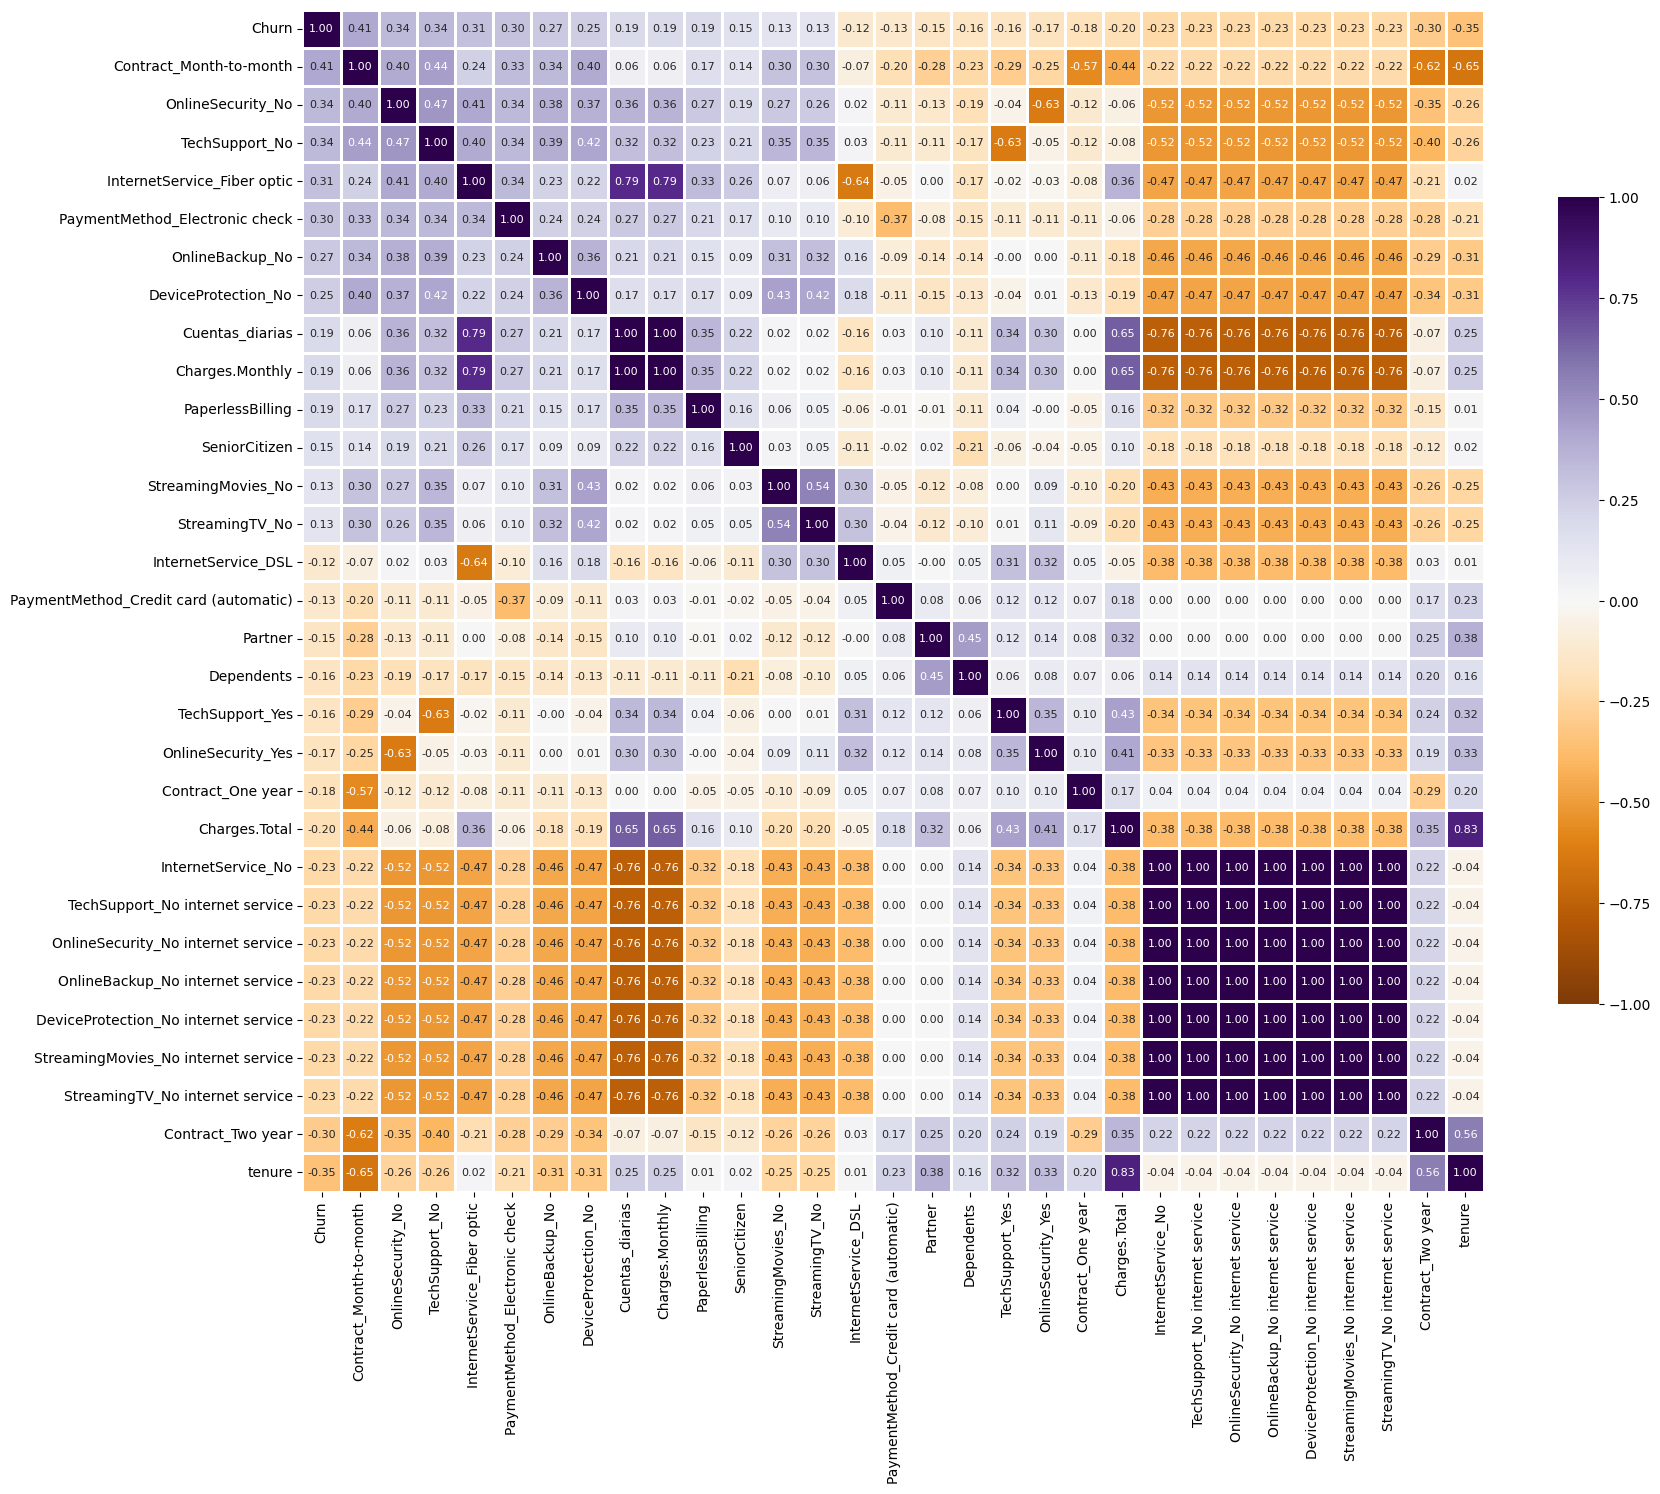

In [48]:
fig, ax = plt.subplots(figsize=(18,18))

ax = sns.heatmap(
    np.round(df_cod[var_importantes].corr(), 2),
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=1,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
    cmap="PuOr"
)

plt.tight_layout()
plt.show()

Aquí ahora podemos observar que nuestra tabla es muchísimo mas pequeña que la vez anterior, en esta ocasión solo tendremos columnas que tengan por lo menos 12% de correlación con nuestra variable Churn.  Sin embargo, pare haber una serie de columnas que interactúan de manera 100% igual entre sí, por lo que sería inteligente eliminarlas para tener una categorización mas cerrada.

### **Matriz de correlacion 3**


In [49]:
#Como vemos anteriormente, hay variables que son directamente hijas de otras variables, es decir, que proceden de una variable
#padre, por ejemplo, Charges_diarias viene de Charges monthly, TechSupport_No_Internet viene de InternetService_No etc.
#Por esto es que las eliminare para analizar solo a los principales.
print(corr_altas_churn.index.tolist())

#Las guardare en una variable.
var_importantes_acortadas = corr_altas_churn.index
var_importantes_acortadas = var_importantes_acortadas.drop(['Cuentas_diarias',
                                'InternetService_No',
                                'TechSupport_No internet service',
                                'OnlineSecurity_No internet service',
                                'OnlineBackup_No internet service',
                                'DeviceProtection_No internet service',
                                'StreamingMovies_No internet service',
                                'StreamingTV_No internet service'])

['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'OnlineBackup_No', 'DeviceProtection_No', 'Cuentas_diarias', 'Charges.Monthly', 'PaperlessBilling', 'SeniorCitizen', 'StreamingMovies_No', 'StreamingTV_No', 'InternetService_DSL', 'PaymentMethod_Credit card (automatic)', 'Partner', 'Dependents', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year', 'Charges.Total', 'InternetService_No', 'TechSupport_No internet service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'Contract_Two year', 'tenure']


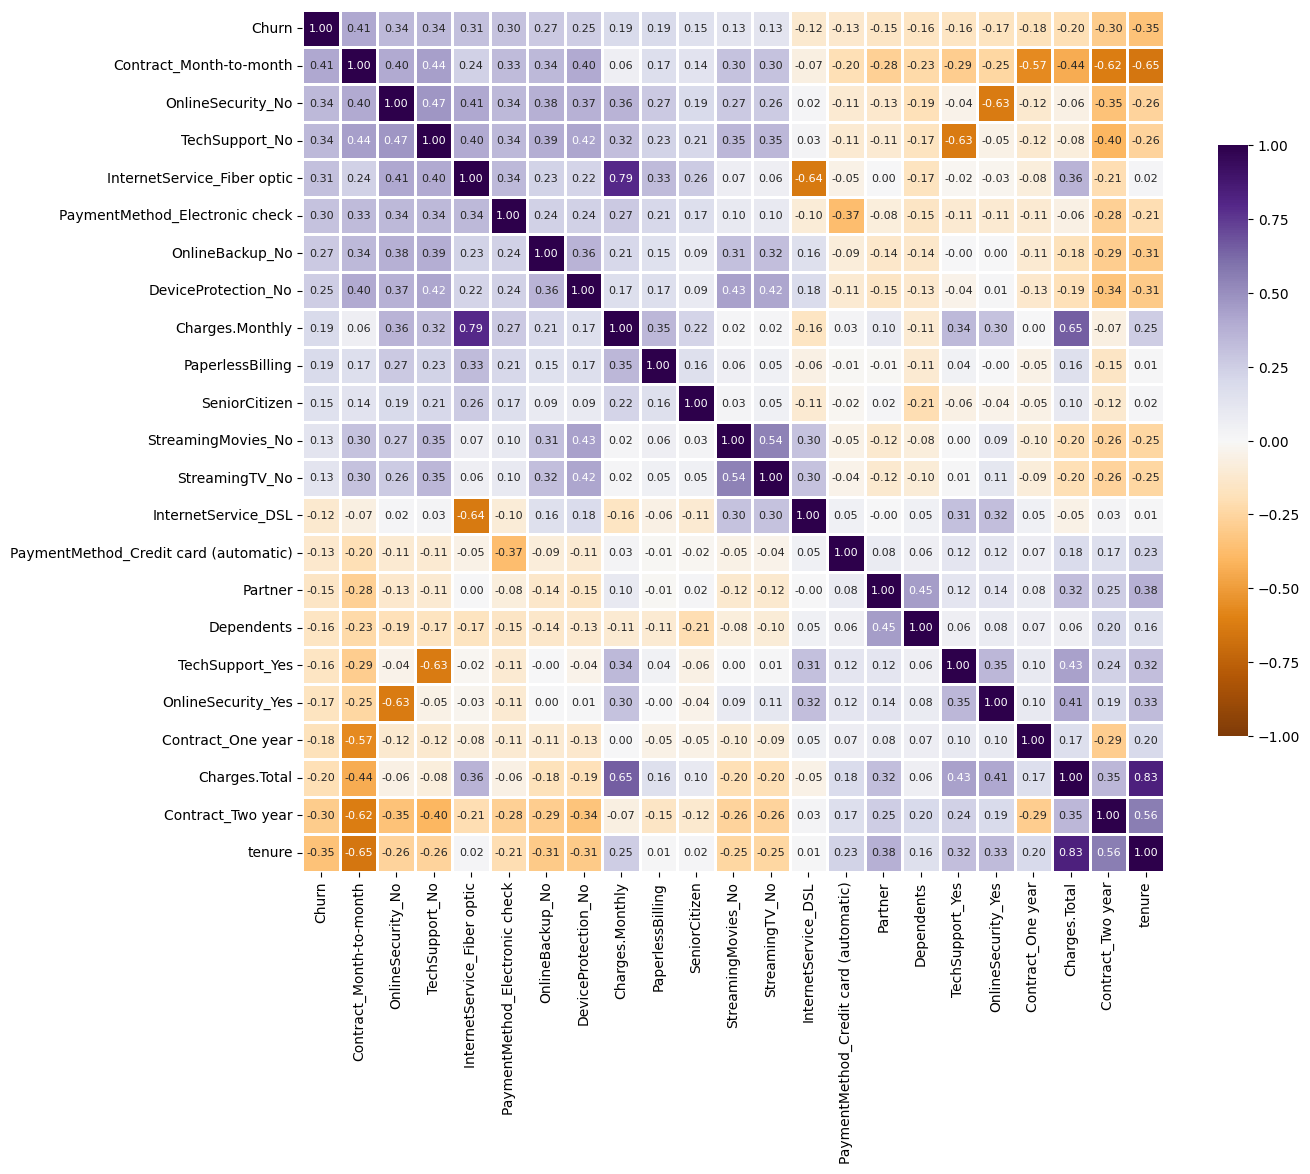

In [50]:
fig, ax = plt.subplots(figsize=(14,14))

ax = sns.heatmap(
    np.round(df_cod[var_importantes_acortadas].corr(), 2),
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=1,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
    cmap="PuOr"
)

plt.tight_layout()
plt.show()

Finalmente terminamos con una matriz de correlación más pequeña, terminamos con 22 columnas de 43 que eran originalmente, donde ahora todas tienen una alta correlación con Churn, eso hace que sea mucho más sencillo identificar situaciones que puedan empujar a un cliente a Abandonar o no hacerlo.

Teniendo esto a nuestra disposición, podemos asumir las siguientes cosas.
*   Aquí podemos comenzar a inferir ciertos que influyen en el abandono de clientes.
*   Entre mayor tiempo en la empresa, menor la posibilidad de irse
*   El contrato de mes a mes está perjudicando
*   Altos cargos al mes provocan más abandono.
*   El pago electrónico provoca mucho abandono
*   La fibra óptica provoca muchos abandonos.
*   Tener o no tener los servicios de seguridad en línea, apoyo en línea, protección en línea y protección de dispositivos marca una enorme diferencia al momento de continuar o no.
*   Los señores mayores son propensos a abandonar


## **Análisis Dirigido**

Nos hacemos cargo de ver como las variables tales como tiempo de tenencia y los gastos totales se relacionan con la cancelación.  Para esto utilizamos un boxplot, a manera de identificar la tendencia de nuestros datos, también manejamos un histograma para poder ver cómo evoluciona la frecuencia de los valores conforme estos avanzan en valor.

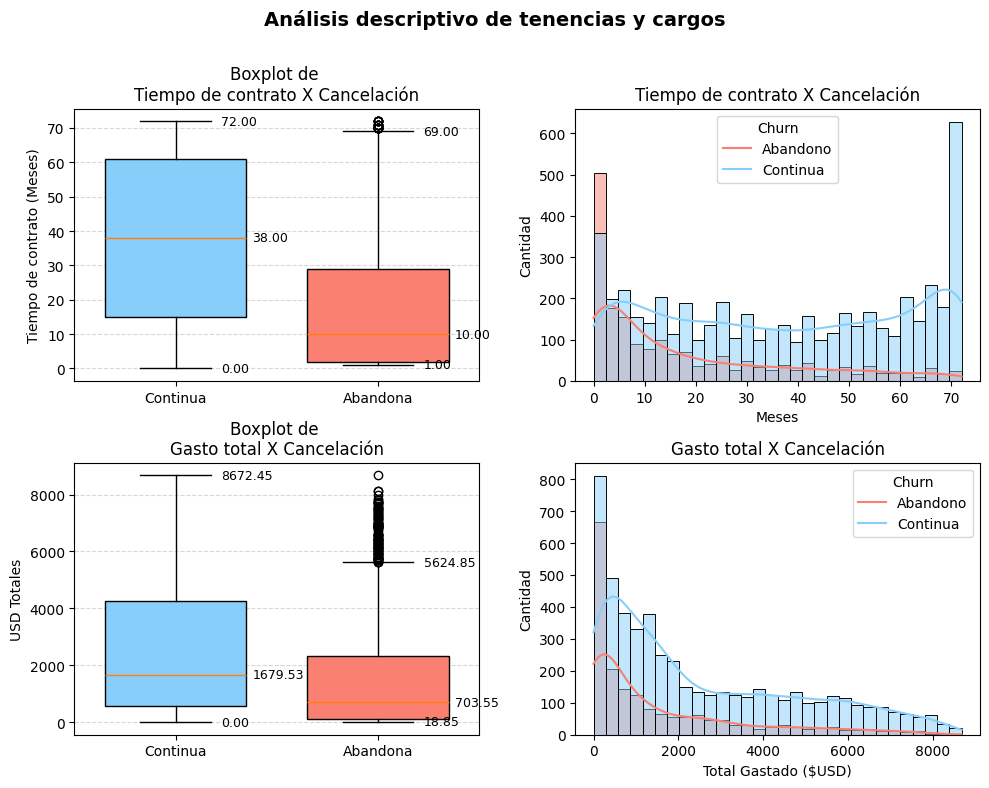

In [51]:
# Colores

colores = ['lightskyblue','salmon']

def boxplot_graf_churn(pos1, pos2, df, columna, titulo, xlabel, ylabel):
  datos_true = df[df['Churn'] == True][columna]
  datos_false = df[df['Churn'] == False][columna]

  # Boxplot
  bp = axs[pos1][pos2].boxplot(
      [datos_false, datos_true],
      tick_labels=['Continua','Abandona'],
      patch_artist=True,
      widths=0.7  # <-- ancho de las cajas
    )

  for patch, color in zip(bp['boxes'], colores):
    patch.set_facecolor(color)

  tam_letra = 9

  # Medianas
  for line in bp['medians']:
    x, y = line.get_xydata()[1]
    axs[pos1][pos2].text(x + 0.03, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  # Whiskers
  #for i, line in enumerate(bp['whiskers']):
   # x, y = line.get_xydata()[1]
    #axs[pos1][pos2].text(x, y , f'{y:.2f}', va='center', fontsize=tam_letra)

  # Caps (mínimo y máximo)
  for i, cap in enumerate(bp['caps']):
    x, y = cap.get_xydata()[0]
    axs[pos1][pos2].text(x + 0.40, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  axs[pos1][pos2].set_title(f'Boxplot de \n{titulo}')
  axs[pos1][pos2].set_xlabel(xlabel)
  axs[pos1][pos2].set_ylabel(ylabel)
  axs[pos1][pos2].grid(axis='y', linestyle='--', alpha=0.5)


def grafica_numericos(pos1, pos2,df, columna, titulo, xlabel):

    sns.histplot(data=df, x=columna, hue='Churn', kde=True, palette=colores, bins=30, ax=axs[pos1][pos2])
    axs[pos1][pos2].set_title(titulo)
    axs[pos1][pos2].set_xlabel(xlabel)
    axs[pos1][pos2].set_ylabel('Cantidad')
    axs[pos1][pos2].legend(labels=['Abandono','Continua'], title='Churn')




# Crear figura y ejes
fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.subplots_adjust(hspace=.5,wspace=.5)
fig.suptitle('Análisis descriptivo de tenencias y cargos\n', fontsize=14, weight='bold')

# Graficar
boxplot_graf_churn(0, 0, df_cod, 'tenure', 'Tiempo de contrato X Cancelación', '', 'Tiempo de contrato (Meses)')
grafica_numericos(0,1, df_cod, 'tenure', 'Tiempo de contrato X Cancelación','Meses')

boxplot_graf_churn(1 ,0, df_cod, 'Charges.Total', 'Gasto total X Cancelación', '', 'USD Totales')
grafica_numericos(1, 1, df_cod, 'Charges.Total', 'Gasto total X Cancelación','Total Gastado ($USD)')

plt.tight_layout()
plt.show()

**Análisis de tiempo de contrato**

*   En la gráfica boxplot, se puede observar una concentración de los clientes en el centro de la población, lo que indica de una gran parte de los clientes que continúan renovando se encuentran cerca de la media.

*   En la misma grafica boxplot se observa una tendencia alarmante hacia los valores cercanos a 0.  Esto nos indica que habrá una asimetría a la derecha al momento de querer conocer la tendencia de nuestros valores.

*  En el histograma se muestra una curva que inicialmente desciende, pero con el tiempo comienza a aumentar de manera sustancial.  Esto puede indicar la razón por la cual la correlación de Tenure con Churn es negativa, pues conforme más pasa el tiempo menor es la frecuencia de abandono y

**Análisis de Gastos totales**

*  En esta ocasión, ambas graficas tienen una inclinación hacia los valores de 0, significando que ambas tendencias tendrán una tabla con una asimetría a la derecha, esto concentra nuestra información a los valores mas bajos, lo que quiere decir que hay mas clientes que han gastado poco y hay pocos que han gastado mucho.  Aunque, los que se quedan tienen un margen mucho mas alto de gastos totales.

*   En el histograma podemos confirmar que ambas graficas tienen una asimetría a la derecha, pues gran parte de los clientes se mantiene dentro de los 1500 dólares gastados, esto podría ser por una súbita ola de clientes contratando el servicio hace poco tiempo, posiblemente por alguna oferta o promoción que fue exitosa en su momento.



## **Modelos**

El principio del machine learning reside en crear los modelos de aprendizaje, esto son algoritmos matemáticos que utilizan información ya existente para poder identificar patrones dentro de nuestra información.  A continuación, utilizaremos 3 modelos para poder identificar las variables que mas afectan en nuestro estudio y el factor de probabilidad que tienen de acertar en nuestras predicciones.

### **Separación de datos**

Comenzaremos por separar nuestra información, para que un modelo de aprendizaje sirva, es necesario nutrirlo con una base de datos amplia, pero inicialmente, es necesario solo darle una pequeña parte de nuestra base total de aprendizaje. Es por eso que para los modelos se separan en datos de entrenamiento y datos de prueba.  
 \
De esta manera durante el entrenamiento le entregamos a la computadora un set de información correcta y la futura información que reciba durante el testeo  se utilizara como prueba para ver si la computadora es capaz de predecir correctamente.

In [52]:
#Se manejan muchas bibliotecas, aqui las exporto todas de una ves

from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, train_test_split,KFold, cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from yellowbrick.regressor import prediction_error, residuals_plot
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score,roc_curve, precision_recall_curve, auc

Aqui guardamos las columnas que evaluaremos dentro de nuestro modelo.

In [88]:
#Aqui esta bien sencillo hacerse bolas, vamos paso a paso
#X es donde guardamos las columnas que vamos a evaluar
X = df_cod[var_importantes_acortadas].drop('Churn',axis=1)

#Y es la clase contra lo que las vamos a evaluar
y = df_cod['Churn']

#Esta es una Mickeyherramienta que nos servira mas tarde.
def intervalo_confianza(resultados):
  promedio = cv_resultados['test_score'].mean()
  desvio_std = cv_resultados['test_score'].std()
  return f'El intervalo de confianza es de: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'


Aquí las separamos en testeo y entrenamiento, le damos un 30% de la base de datos a nuestro entrenamiento, utilizamos stratify para que la cantidad de muestras sea proporcional a Y, es decir: Abandono.

In [89]:
#Aqui se guardan las variables de entrenamiento y de prueba
#en los parametros de traintest split, como dice, separa los datos.
#recibe X y Y y los separa en tu test size. Stratify asegura que tu proporcion sea
#constante, sobre todo cuando las muestras estan desbalanceadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=127, stratify=y)


### **Balanceo de Churn**

Si recordamos bien, cuando medimos la proporción de abandono de la columna Churn, vimos que nuestra base de datos tenía una proporción de 27% de abandono frente a un 73% de no abandono, esto implica que estaríamos trabajando nuestro modelo con una base de datos desbalanceada.

La manera ideal de trabajar con esta información es realizar un balanceo, lo cual se realiza eliminando datos existentes, o creando datos artificiales.


### **Modelo de balanceo con Oversample - Desicion tree**

A continuación realizamos un balanceo con oversampling para crear un modelo de tipo Arbol de decisión

In [90]:
#Primero definimos SMOTE, un paquete que nos ayuda a inventar datos falsos basandose en los ya existentes.
oversampling = SMOTE(random_state=42)

#Luego creamos variables nuevas balanceadas que sustituyen a las que hicimos antes (Pero no las reemplazan)
X_balanceada, y_balanceada = oversampling.fit_resample(X,y)


y_balanceada.value_counts()

,count
Churn,
0,5174
1,5174


In [91]:
#Como podemos ver, ambas X y Y suman 10348 tras el oversample
len(X_balanceada)

10348

In [92]:
modelo = DecisionTreeClassifier(max_depth=7)
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo,X_balanceada,y_balanceada,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.0346036 , 0.03434563, 0.04524541, 0.032794  , 0.0336051 ]),
 'score_time': array([0.00542879, 0.00645328, 0.00582981, 0.00542212, 0.00546312]),
 'test_score': array([0.89082126, 0.8589372 , 0.86763285, 0.82301741, 0.82898551])}

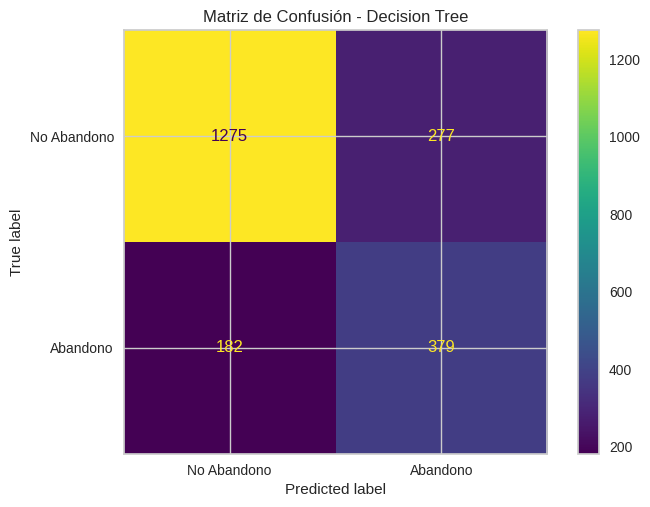

Exactitud (Accuracy): 0.7828
Precisión (Precision): 0.5777
Recall (Sensibilidad): 0.6756
F1-score: 0.6228

Reporte completo:
              precision    recall  f1-score   support

 No Abandono       0.88      0.82      0.85      1552
    Abandono       0.58      0.68      0.62       561

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.80      0.78      0.79      2113



In [93]:
# Entrenamos el árbol con los datos balanceados
modelo_dt = DecisionTreeClassifier(max_depth=7, random_state=5)
modelo_dt.fit(X_balanceada, y_balanceada)

# Hacemos predicciones sobre X_test (puedes usar tus datos originales de test)
y_pred_dt = modelo_dt.predict(X_test)

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    modelo_dt,
    X_test,
    y_test,
    display_labels=['No Abandono', 'Abandono'],
    values_format='d'
)
plt.title("Matriz de Confusión - Decision Tree")
plt.show()

# 4️⃣ Métricas principales
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 5️⃣ Reporte completo
print("\nReporte completo:")
print(classification_report(y_test, y_pred_dt, target_names=['No Abandono', 'Abandono']))


### **Análisis de la Importancia de las Variables Modelo 1**

In [96]:
importances = modelo_dt.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns,'Importances': (importances*100).round(2)}).sort_values('Importances', ascending = False)
feature_importances

,Features,Importances
0,Contract_Month-to-month,35.48
18,Contract_One year,20.58
7,Charges.Monthly,10.68
20,Contract_Two year,7.54
17,OnlineSecurity_Yes,6.42
16,TechSupport_Yes,5.13
19,Charges.Total,5.03
13,PaymentMethod_Credit card (automatic),2.73
14,Partner,1.99
21,tenure,1.48


Para este modelo, podemos concluir las siguientes cosas de acuerdo con el modelo de arbol de decisión y la importancia sus variables

*   El contrato mes a mes (35.48%) es el principal factor, lo que reafirma que los clientes que llevan un corto plazo son los más propensos a cancelar.

*   El contrato de un año (20.58%) y de dos años (7.54%) muestran un efecto positivo, ya que quienes se comprometen más tiempo tienden a ser más fieles.

*   Los cargos mensuales (10.68%) y totales (5.03%) tienen un peso significativo, sugiriendo que la percepción de costos altos sigue siendo un provocado de abandono.

*   La seguridad en línea (6.42%) y el soporte técnico (5.13%) aportan al modelo, indicando que servicios adicionales de soporte pueden reducir la evasión.

*   El resto de variables tiene importancia marginal (≤ 2.73%), mostrando que métodos de pago, estado civil o edad no son considerados por el modelo de aprendizaje en comparación con contrato y costos.

### **Resultado modelo 1 - Desicion Tree**

**Accuracy = 0.7828 | Precision = 0.5777 | Recall = 0.6756 | F1 = 0.6228**

*   La clase de abandono logra un recall relativamente alto (≈0.68), lo que significa que detecta bien a los clientes que efectivamente abandonan

*   Sin embargo, la precisión es más baja (≈0.58), lo que implica que hay una proporción considerable de falsos positivos (clientes clasificados como abandono que realmente no lo son)

*   El equilibrio entre recall y precisión refleja un modelo enfocado en captar abandonos aunque se equivoque más en la clase mayoritaria, con un F1 decente (~0.62)

*   Tiene un buen balance entre detectar abandonos (recall) y evitar muchas falsas alarmas

*   Relativamente pocos falsos negativos → está detectando bien a quienes sí abandonan

*   A pesar de todo, tiene más falsos positivos que falsos negativos, lo que puede llevar a alarmas innecesarias (clientes que no se iban a ir pero son señalados)

### **Modelo balanceo con UnderSample - KNN**

In [76]:
#Para el Undersample usamos otro metodo
#Aqui en lugar de SMOTE utilizamos NearMiss,
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])

#De la siguiente manera podemos verificar que efectivamente, la proporcion esta balanceada
#porque se hizo la muestra mas pequena de lo que ya era
nm = NearMiss(version=3)
X_res, y_res = nm.fit_resample(X, y)

# Contamos cuántos registros quedaron por clase
conteo = pd.Series(y_res).value_counts().sort_index()
print(conteo)

skf = StratifiedKFold (n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

Churn
0    1869
1    1869
Name: count, dtype: int64


'El intervalo de confianza es de: [0.5963567465343101, 0.7177548791054656]'

### **Normalizacion y KNN**

In [98]:
#Declaro mis 2 variables que usare para normalizar
#Defino MinMax hace que mis datos esten a la misma escala
normalizacion = MinMaxScaler()

#Ahora defino Knn es para normalizar
knn= KNeighborsClassifier()

In [99]:
#Se normalizan los valores para que queden entre 0 y 1
X_train_norm = normalizacion.fit_transform(X_train)

In [100]:
#Knn busca los vecinos mas cercanos
knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [101]:
#Ahora se normalizan las variables de prueba
X_test_normalizado = normalizacion.transform(X_test)

In [102]:
#Nos devuelven la precision, es decir, que tan acertado es
knn.score(X_test, y_test)

0.73450070989115

In [103]:
#Nos devuelven la precision, es decir, que tan acertado es
knn.score(X_test_normalizado, y_test)

0.7567439659252247

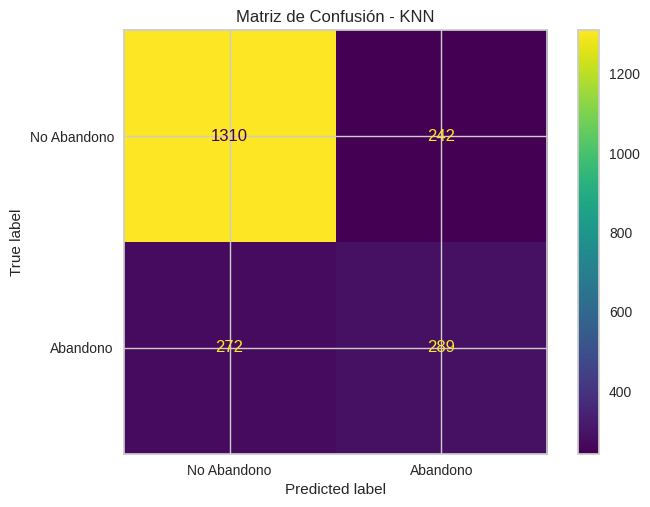

Exactitud (Accuracy): 0.7567
Precisión (Precision): 0.5443
Recall (Sensibilidad): 0.5152
F1-score: 0.5293

Reporte completo:
              precision    recall  f1-score   support

 No Abandono       0.83      0.84      0.84      1552
    Abandono       0.54      0.52      0.53       561

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.75      0.76      0.75      2113



In [104]:
y_pred = knn.predict(X_test_normalizado)

# Matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test_normalizado,
    y_test,
    display_labels=['No Abandono', 'Abandono'],
    values_format='d'
)
plt.title("Matriz de Confusión - KNN")
plt.show()

#  Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte completo
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['No Abandono', 'Abandono']))

### *Resultado modelo 2 - KNN**

**Accuracy = 0.7567 | Precision = 0.5443 | Recall = 0.5152 | F1 = 0.5293**

*   Tanto la precisión como el recall para abandono son modestos (~0.54 y ~0.51)

*   Esto indica que el modelo no discrimina bien la clase minoritaria (abandono), detectando apenas la mitad y con muchos falsos positivos

*   La clase de no abandono está muy bien clasificada (precision/recall ≈ 0.83-0.84), lo que infla la exactitud general

*   Interpretación: este modelo sufre de underfitting hacia la clase de abandono, priorizando estabilidad global pero sacrificando la detección de clientes en riesgo

*   Muy bueno identificando clientes que no abandonan

*   Tiene menos falsos positivos que Decision Tree → da menos “falsas alarmas”

*   Mucho peor en recall → se le escapan más clientes que sí abandonan

*   En un problema de Churn Prediction, esto es grave, porque la empresa pierde clientes reales sin detectarlos

###**Modelado por Random Forest**

In [109]:
#Creamos un dummy, es decir, un modelor de referencia que no aprende nada
#Sirve para saber si nuestro modelo final es mejor que solo predecir el promedio

baseline = DummyRegressor()
baseline.fit(X_train,y_train)
y_pred_dummy = baseline.predict(X_test)


#Creamos una función
def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse **(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [110]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4416, 'MAE': 0.3899, 'R2': -0.0}

In [111]:
modelo = RandomForestRegressor(max_depth=3, random_state=42)


In [112]:
modelo.fit(X_train, y_train)
ypred= modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

#Si el Random Forest tiene menor RMSE/MAE y mayor R² que el Dummy, significa que sí aprendió patrones.

{'RMSE': 0.3799, 'MAE': 0.2885, 'R2': 0.2598}

A continuación realizamos un Grid search para identificar las variables que nos dan los hiperparametros y nos dirán cuales son los mejores parámetros disponibles para que nuestro modelo tenga la mayor precisión posible.

In [ ]:
#Solo correrlo una vez

rf = RandomForestRegressor(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 110, 120, 130, 140],         # Número de árboles
    'max_depth': [6, 7, 8, 9, None],          # Profundidad máxima de los árboles
    'min_samples_split': [5, 6, 7, 8, 9],         # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],           # Mínimo de muestras por hoja
    'max_features': ['auto', 'sqrt', 'log2'] # Número de features consideradas al dividir
}

# Definimos la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                    # Validación cruzada (5 folds)
    scoring='r2',            # Métrica a optimizar
    n_jobs=-1,               # Usa todos los núcleos disponibles
    verbose=2                # Imprime el progreso
)

# Entrenamos la búsqueda
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo entrenado
mejor_modelo = grid_search.best_estimator_

# Evaluamos en test
y_pred_gs = mejor_modelo.predict(X_test)
resultados_gs = calcular_regresion(y_test, y_pred_gs)

print("\nResultados en test:")
print(resultados_gs)

Como tarda alrededor de 25 minutos no quiero volverlo a ejecutar, por lo que aqui anoto los resultados del primer analisis
 \
 \
 \
*Fitting 5 folds for each of 324 candidates, totalling 1620 fits*

*Mejores parámetros encontrados:*

*{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2,* *'min_samples_split': 10, 'n_estimators': 100}*

*Resultados en test:*

*{'RMSE': 0.3692, 'MAE': 0.2751, 'R2': 0.301}*
  \
  \
  \
Despues lo vuelvo a correr con parametros diferentes, aqui podemos ver lo que yo considero, el mejor resultado.
  \
  \
*Fitting 5 folds for each of 1125 candidates, totalling 5625 fits*
*Mejores parámetros encontrados:*
*{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2,* *'min_samples_split': 8, 'n_estimators': 110}*

Resultados en test:
{'RMSE': 0.3682, 'MAE': 0.2795, 'R2': 0.305}


In [114]:
#Volvemos a hacer la segmentacion
X = df_cod[var_importantes_acortadas].drop('Churn',axis=1)

#Y es la clase contra lo que las vamos a evaluar
y = df_cod['Churn']

#Esta es una Mickeyherramienta que nos servira mas tarde.
def intervalo_confianza(resultados):
  promedio = cv_resultados['test_score'].mean()
  desvio_std = cv_resultados['test_score'].std()
  return f'El intervalo de confianza es de: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'


In [115]:
#Aqui se guardan las variables de entrenamiento y de prueba
#en los parametros de traintest split, como dice, separa los datos.
#recibe X y Y y los separa en tu test size. Stratify asegura que tu proporcion sea
#constante, sobre todo cuando las muestras estan desbalanceadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=127, stratify=y)

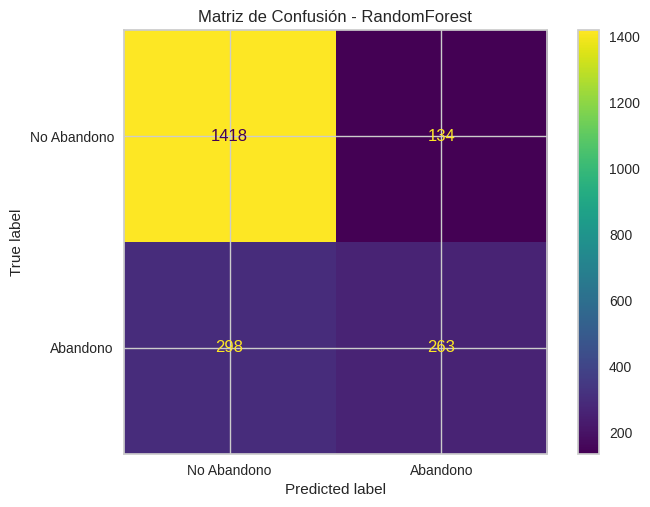

Exactitud (Accuracy): 0.7956
Precisión (Precision): 0.6625
Recall (Sensibilidad): 0.4688
F1-score: 0.5491

Reporte completo:
              precision    recall  f1-score   support

 No Abandono       0.83      0.91      0.87      1552
    Abandono       0.66      0.47      0.55       561

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [116]:
# Entrenamos RandomForest
modelo_rf = RandomForestClassifier(max_depth=5, random_state=5)
modelo_rf.fit(X_train, y_train)
y_pred = modelo_rf.predict(X_test)

# Matriz de confusión con el mismo formato que KNN
disp = ConfusionMatrixDisplay.from_estimator(
    modelo_rf,
    X_test,
    y_test,
    display_labels=['No Abandono', 'Abandono'],  # Etiquetas en español
    values_format='d'
)
plt.title("Matriz de Confusión - RandomForest")
plt.show()

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte completo con nombres de clase
print("\nReporte completo:")
print(classification_report(y_test, y_pred, target_names=['No Abandono', 'Abandono']))

### **Análisis de la Importancia de las Variables Modelo 3**

In [120]:
importances = modelo_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns,'Importances': (importances*100).round(2)}).sort_values('Importances', ascending = False)
feature_importances

,Features,Importances
0,Contract_Month-to-month,22.15
21,tenure,13.76
1,OnlineSecurity_No,9.91
19,Charges.Total,8.55
3,InternetService_Fiber optic,8.39
2,TechSupport_No,7.84
7,Charges.Monthly,5.93
20,Contract_Two year,4.32
4,PaymentMethod_Electronic check,3.84
5,OnlineBackup_No,3.01


Para este modelo, podemos concluir las siguientes cosas de acuerdo con el modelo de arbol de decisión y la importancia sus variables

*   El contrato mes a mes (22.15%) mantiene el primer lugar como factor de riesgo, aunque con menor peso que en el primer modelo, sigue siendo el predictor más fuerte.

*   La antigüedad del cliente (13.76%) aparece mucho más relevante, reflejando que el tiempo de permanencia tiene un impacto directo en la lealtad de los clientes.

*   Variables de servicios como seguridad en línea (9.91%) y soporte técnico (7.84%) aparecen por primera vez, parece ser que la ausencia de estos 2 servicios influye en que los clientes abandonen

*   Los costos (cargos totales 8.55% y mensuales 5.93%) siguen siendo determinantes, significa que

*   Factores como método de pago electrónico (3.84%) o tipo de internet (DSL 2.47% vs fibra 8.39%) muestran que la experiencia de los usuarios está influyendo mucho en la decision de abandono.

### **Resultado modelo 3**

**Accuracy = 0.7956 | Precision = 0.6625 | Recall = 0.4688 | F1 = 0.5491**

*   Se observa el efecto contrario al Modelo 1: aquí la precisión para abandono es alta (casi 0.66), pero el recall cae (casi 0.47)

*   Esto significa que cuando predice abandono suele acertar, pero deja escapar a más de la mitad de los clientes que realmente se van (muchos falsos negativos)

*   La clase de no abandono está muy sólida (un recall de casi 0.91), lo que eleva el accuracy total (aproximadamente 0.80)

*   Interpretación: este modelo es conservador: prefiere estar seguro antes de marcar a alguien como abandono, lo que reduce falsos positivos pero aumenta falsos negativos

*   Tiene una alta precisión, cuando predice abandono, suele tener razón.

*   Tiene menos falsos positivos que los otros modelos con solo 134.

*   El recall es bajo (46.9%), es decir, casi la mitad de los clientes que realmente abandonan no están siendo detectados.

*   Esto puede ser crítico en un problema de churn, porque la empresa pierde clientes que el modelo no identifica.

### **Análisis de la Importancia de las Variables**

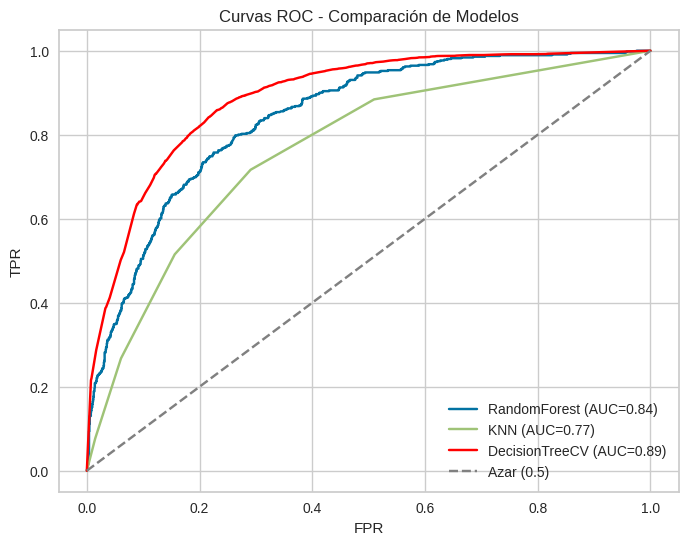

AUC de cada modelo:
DecisionTreeCV : 0.889
RandomForest : 0.843
KNN : 0.766


In [75]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Diccionario de modelos (ahora incluimos DecisionTreeCV)
modelos = {
    "RandomForest": modelo_rf,
    "KNN": knn
}

# StratifiedKFold para DecisionTree
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

plt.figure(figsize=(8,6))
auc_res = {}

# Curvas para RF y KNN
for nombre, clf in modelos.items():
    if nombre == "KNN":
        proba = clf.predict_proba(X_test_normalizado)[:,1]
    else:
        proba = clf.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    auc_res[nombre] = auc
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Curva para DecisionTree con validación cruzada
y_proba_dt = cross_val_predict(
    DecisionTreeClassifier(max_depth=7, random_state=5),
    X_balanceada,
    y_balanceada,
    cv=skf,
    method='predict_proba'
)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_balanceada, y_proba_dt)
auc_dt = roc_auc_score(y_balanceada, y_proba_dt)
auc_res["DecisionTreeCV"] = auc_dt
plt.plot(fpr_dt, tpr_dt, label=f"DecisionTreeCV (AUC={auc_dt:.2f})", color="red")

# Línea de referencia
plt.plot([0,1],[0,1],"--", color="gray", label="Azar (0.5)")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC - Comparación de Modelos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Imprimir AUC de todos los modelos
print("AUC de cada modelo:")
for nombre, auc in sorted(auc_res.items(), key=lambda x: x[1], reverse=True):
    print(nombre, ":", round(auc,3))


### **Interpretación de la Curva ROC y el AUC**



**DecisionTreeCV (AUC = 0.889)**
*   Este es el modelo que se balanceo con Oversample

*   Es el mejor modelo en esta comparación.

*   La curva se mantiene más cerca de la esquina superior izquierda, lo que indica una buena capacidad de separar las clases.

*   AUC cercano a 0.90 significa alta discriminación entre clientes que abandonan y los que no.



**RandomForest (AUC = 0.843)**

*   Este modelo no requiere normalizacion por la manera en que funciona Random Forest.

*   Segundo mejor modelo, también con una curva consistente y por encima de la diagonal.

*   Su AUC ≈ 0.84 lo convierte en un modelo muy sólido y confiable, aunque un poco menos eficaz que el árbol ajustado con validación cruzada.



**KNN (AUC = 0.766)**
*   Este es el modelo que se normalizo con undersample

*   Tiene la curva más alejada de la esquina superior izquierda.

*   Con un AUC ≈ 0.77, su rendimiento es aceptable, pero claramente inferior a los otros dos.

*   Esto indica que el KNN no discrimina tan bien entre clientes que abandonan y los que no.

## **Conclusión del mejor modelo**

*   DecisionTreeCV es el ganador: logra el mejor balance entre sensibilidad y especificidad.

*   RandomForest sigue siendo una opción fuerte y robusta.

*   KNN queda rezagado y probablemente no sea la mejor opción en este problema.

# **Conclusiones**

## **Conclusiones generales**

De acuerdo con el análisis realizado podemos concluir algunos puntos importantes que son importantes de resaltar.

*   **Contrato mensuales y de largo plazo son claves** Los contratos de mes a mes contrastan de una manera enorme con los contratos de 1 y 2 meses en el momento de decidir si continúan con la empresa o abandonan.  Los contratos de corto plazo no generan el tiempo suficiente para que estos adopten una postura de lealtad hacia la empresa.  

*   **Clientes más nuevos terminan en mayor evasión:** Los clientes nuevos son más propensos a irse, entre más tiempo pasan estos en la empresa más comprometidos se sienten por seguir renovando.

*   **Problemas de infraestructura:**  Los clientes que contrataron servicio de internet con fibra óptica son altamente propensos a abandonar.  Esto puede causar del precio o causa de un mal servicio.  En ambos casos, es importante replantear la estrategia.

*   **Servicios alejan cleintes:** De los servicios ofrecidos, parece ser que los servicios de Techsupport , Online Security y StreamingTV estan influyendo mucho en la decisión de los clientes por mantenerse o no en la empresa

*   **Precios** El costo mensual y el cargo total son un factor muy grande en el momento de abandonar o continuar en la compañía. Puede estar relacionado en los precios que gastan los clientes, ya sea porque son muy altos o porque sean bajos, esto parece ser un factor determinante.


## **Recomendaciones y sugerencias estratégicas.**

*   **Fidelización temprana de clientes:** Implementar estrategias de retención desde los primeros meses de contrato, especialmente para clientes de mes a mes. Esto puede incluir promociones iniciales, paquetes especiales, descuentos o incentivos que aumenten la percepción de valor y fomenten la lealtad. Asimismo, incentivar contratos de 1 o 2 años ofreciendo ventajas exclusivas para compromisos más largos.

*   **Optimización de plataformas digitales:** Revisar y mejorar las plataformas de pago y facturación en línea para asegurar una experiencia de usuario ágil, clara y confiable. Esto incluye analizar posibles problemas de navegación, velocidad de respuesta y flexibilidad, buscando reducir fricciones que puedan generar abandono.

*   **Impulsar los servicios secundarios:** Promover activamente servicios como TechSupport, Online Security y StreamingTV mediante paquetes o demostraciones que muestren su valor. Ofrecer orientación o asesorías sobre el uso de estos servicios puede aumentar la percepción de utilidad y satisfacción del cliente.


*   **Atención a clientes nuevos y de alto riesgo:** Identificar a clientes con alto riesgo de abandono (nuevos o con contratos cortos) y brindar beneficios específicos, como paquetes de prueba, orientación personalizada o comunicaciones frecuentes que aumenten el compromiso con la empresa.

*   **Planes y precios flexibles:** Revisar la estructura de precios y plazos. Se recomienda ofrecer opciones intermedias (por ejemplo, contratos de 3 y 6 meses) para adaptarse a distintos perfiles de clientes y permitir un periodo de adaptación más largo que un contrato mensual.

*   **Beneficios para clientes mayores:** Diseñar ofertas especiales para clientes adultos mayores, considerando posibles barreras tecnológicas. Esto puede incluir precios preferenciales, asistencia personalizada y guías de uso de servicios digitales para aumentar la retención.

*   **Incentivos para clientes leales:** Premiar a clientes antiguos o con un historial de permanencia prolongada mediante descuentos, paquetes exclusivos o recompensas por alcanzar ciertos periodos de contratación, fomentando la continuidad y reduciendo la evasión.